In [1]:
import oct2py
%load_ext oct2py.ipython
oc_temp_dir = "C:/software/octave_temp_dir"

In [ ]:
%%octave -t {oc_temp_dir}
cerrPath = 'C:/software/CERR_octave_dev/CERR'
addpath(genpath(cerrPath));
%warning('off')
pkg load io
pkg load image
pkg load statistics

In [3]:
ptDcmDir = r'X:\Data\TCIA_Prostate_Diagnosis\manifest-gJIZVVFt6412408718812805737\PROSTATE-DIAGNOSIS\ProstateDx-01-0020\12-29-2008-NA-MRI PROSTATE WITH AND WITHOUT CONTRAST-82889\501.000000-T1WTSEAX-54883'

In [4]:
%octave_push ptDcmDir

### Read DICOM image series using CERR

In [ ]:
%%octave -t {oc_temp_dir}
optS = getCERROptions;
mergeScansFlag = 'No';
init_ML_DICOM
planC = dicomDirToPlanC(ptDcmDir,optS,mergeScansFlag);
indexS = planC{end};
ctOffset = planC{indexS.scan}(1).scanInfo(1).CTOffset;
cerrScanAray = double(planC{indexS.scan}(1).scanArray) - ctOffset;

In [6]:
%octave_pull cerrScanAray

In [7]:
import numpy as np
cerrScanAray = cerrScanAray.astype(np.float32)
cerrScanAray = np.transpose(cerrScanAray, (2, 0, 1))
print("cerrScanAray shape {0}".format(cerrScanAray.shape))


cerrScanAray shape (38, 320, 320)


### Read DICOM image series using SimpleITK

In [8]:
import SimpleITK as sitk
reader = sitk.ImageSeriesReader()
dicom_names = reader.GetGDCMSeriesFileNames(ptDcmDir)
reader.SetFileNames(dicom_names)
image = reader.Execute()
npSitkImg = sitk.GetArrayFromImage(image)
print("npSitkImg shape {0}".format(npSitkImg.shape))

npSitkImg shape (38, 320, 320)


### View images imported from CERR and SimpleITK

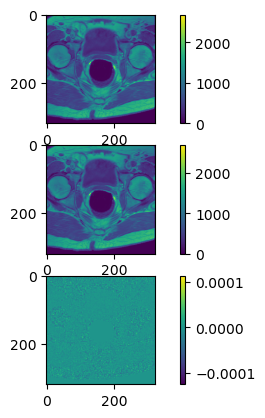

In [10]:
slcNumFromInferior = 10
cerrSlcM = cerrScanAray[-slcNumFromInferior-1,:,:]
sitkSlcM = npSitkImg[slcNumFromInferior,:,:]
diffM = cerrSlcM - sitkSlcM       

plt.subplot(311)
plt.imshow(sitkSlcM)
plt.colorbar()
plt.subplot(312)
plt.imshow(cerrSlcM)
plt.colorbar()
plt.subplot(313)
plt.imshow(diffM)
plt.colorbar()
plt.show()